# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [19]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

!!!! Os insights estarão logo abaixo da resolução das tarefas.

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw.munResLat.dtypes

dtype('float64')

In [25]:
sinasc =  sinasc_raw.set_index('munResLat')
mapping = {-8.76888:'Abaixo de -10.5' ,
           -9.90846:'Abaixo de -10.5' ,
           -10.43595:'Abaixo de -10.5' ,
           -10.72357:'Acima de -10.5' ,
           -10.77388 : 'Acima de -10.5' ,
           -11.43387:'Acima de -10.5' ,
           -11.67754:'Acima de -10.5' ,
}
sinasc.groupby(mapping)['munResLon','munResAlt'].agg(['sum','min','max','median','mean','var','std'])

C:\Users\Belit\AppData\Local\Temp\ipykernel_26372\377985435.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc.groupby(mapping)['munResLon','munResAlt'].agg(['sum','min','max','median','mean','var','std'])


munResLon                                           \
                          sum       min       max    median       mean   
munResLat                                                                
Abaixo de -10.5 -164026.08246 -63.03327 -62.47623 -63.03327 -62.845242   
Acima de -10.5  -212416.47409 -65.32395 -61.18367 -61.44294 -62.438705   

                                    munResAlt                       \
                      var       std       sum    min    max median   
munResLat                                                            
Abaixo de -10.5  0.069411  0.263460  383934.0  139.0  163.0  139.0   
Acima de -10.5   2.603385  1.613501  620659.0  133.0  252.0  177.0   

                                                     
                       mean          var        std  
munResLat                                            
Abaixo de -10.5  147.101149   128.848331  11.351138  
Acima de -10.5   182.439447  1473.281396  38.383348

Acredito que esses dados consigam sem melhor analisados por pessoas que entendam profundamente de geográfia, pois inserindo apenas a longitude e a altitude, a localização cai no meio do Oceano Pacifico, portanto, esses dados ainda estão incompletos para uma análise, falta a latitude, essa divisão por faixa fica impossivel analisar.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [26]:
sinasc =  sinasc_raw.set_index('munResArea')
mapping = {
    6896.648 : 'Acima 3 mil',
    10071.643 : 'Acima 3 mil',
    1457.888 : 'Abaixo 3 mil',
    1314.352 : 'Abaixo 3 mil',
    24855.724 : 'Acima 3 mil',
    2783.300 : 'Abaixo 3 mil',
}
sinasc.groupby(mapping)['QTDPARTNOR','QTDPARTCES'].agg(['sum','min','max','median','mean','var','std'])

C:\Users\Belit\AppData\Local\Temp\ipykernel_26372\237590911.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc.groupby(mapping)['QTDPARTNOR','QTDPARTCES'].agg(['sum','min','max','median','mean','var','std'])


QTDPARTNOR                                                  \
                    sum  min   max median      mean       var       std   
munResArea                                                                
Abaixo 3 mil      339.0  0.0  10.0    0.0  0.275386  0.648491  0.805290   
Acima 3 mil      2318.0  0.0  10.0    0.0  0.697772  1.596075  1.263358   

             QTDPARTCES                                                  
                    sum  min   max median      mean       var       std  
munResArea                                                               
Abaixo 3 mil      770.0  0.0   4.0    0.0  0.626016  0.603716  0.776992  
Acima 3 mil      1493.0  0.0  12.0    0.0  0.448888  0.580093  0.761639

Nesse exercicio, foi bem interessante trazer a informação de quantidade de partos normais e cesarianas, pois foi um dado pouco explorado, e é tema de várias discussões, sobre como o Brasil tende a realizar muito mais cesáreas do que partos normais.
Verificando acima, podemos analisar que municipios com extensão de area maior, tende a realizar maios partos normais, e municipios menores, realizam mais partos por cesariana.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [27]:
sinasc  =  sinasc_raw.set_index('munResAlt')
mapping = {85.0 :'Baixa Altitude',
   227.0:'Media Altitude',
   595.0 :'Alta Altitude',
   263.0 : 'Media Altitude',
   139.0 : 'Baixa Altitude',
   87.0 : 'Baixa Altitude',
   157.0 : 'Media Altitude',
   419.0 : 'Alta Altitude',
   397.0 : 'Alta Altitude',

}
sinasc .groupby(mapping)['QTDPARTNOR','QTDPARTCES'].agg(['sum','min','max','median','mean','var','std'])

C:\Users\Belit\AppData\Local\Temp\ipykernel_26372\2546560853.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc .groupby(mapping)['QTDPARTNOR','QTDPARTCES'].agg(['sum','min','max','median','mean','var','std'])


QTDPARTNOR                                                  \
                      sum  min   max median      mean       var       std   
munResAlt                                                                   
Alta Altitude       660.0  0.0   9.0    0.0  0.338462  0.731973  0.855554   
Baixa Altitude     6830.0  0.0  40.0    0.0  0.739658  1.747009  1.321745   
Media Altitude     1607.0  0.0  40.0    0.0  0.426713  1.258240  1.121713   

               QTDPARTCES                                                  
                      sum  min   max median      mean       var       std  
munResAlt                                                                  
Alta Altitude      1140.0  0.0   4.0    0.0  0.584615  0.564155  0.751103  
Baixa Altitude     4286.0  0.0  12.0    0.0  0.465010  0.543508  0.737230  
Media Altitude     2183.0  0.0  12.0    0.0  0.579506  0.629298  0.793283

Aproveitando a liberdade de escolher as variáveis, insisti no dados de quantidade de partos, e tive uma constatação muito interessante, apenas municipios com baixa altitude tem o numero de partos normais superiores, municipios com alta altitude tem o dobro praticamente e de média altitude tem uma pequena diferença.
Talvez a altitude tenha alguma intereferência nesse aspecto.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

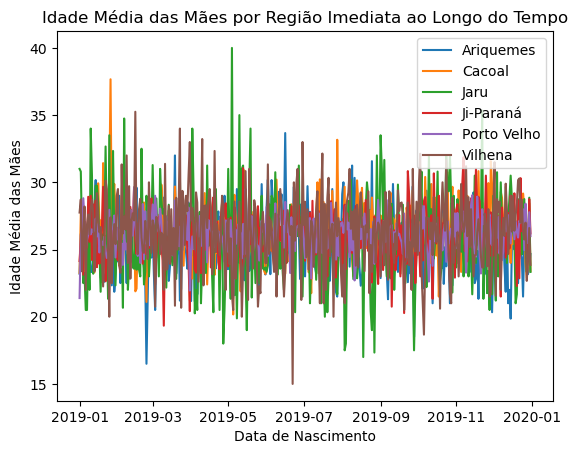

In [40]:
imediatas = {

    "Candeias do Jamari": "Porto Velho",

    "Guajará-Mirim": "Porto Velho",

    "Itapuã do Oeste": "Porto Velho",

    "Nova Mamoré": "Porto Velho",

    "Porto Velho": "Porto Velho",

    "Ariquemes": "Ariquemes",

    "Alto Paraíso": "Ariquemes",

    "Buritis": "Ariquemes",

    "Cacaulândia": "Ariquemes",

    "Campo Novo de Rondônia": "Ariquemes",

    "Cujubim": "Ariquemes",

    "Monte Negro": "Ariquemes",

    "Rio Crespo": "Ariquemes",

    "Jaru": "Jaru",

    "Governador Jorge Teixeira": "Jaru",

    "Machadinho D'Oeste": "Jaru",

    "Theobroma": "Jaru",

    "Vale do Anari": "Jaru",

    "Alvorada D'Oeste": "Ji-Paraná",

    "Costa Marques": "Ji-Paraná",

    "Ji-Paraná": "Ji-Paraná",

    "Mirante da Serra": "Ji-Paraná",

    "Nova União": "Ji-Paraná",

    "Ouro Preto do Oeste": "Ji-Paraná",

    "Presidente Médici": "Ji-Paraná",

    "São Francisco do Guaporé": "Ji-Paraná",

    "São Miguel do Guaporé": "Ji-Paraná",

    "Seringueiras": "Ji-Paraná",

    "Teixeirópolis": "Ji-Paraná",

    "Urupá": "Ji-Paraná",

    "Vale do Paraíso": "Ji-Paraná",

    "Cacoal": "Cacoal",

    "Alta Floresta D'Oeste": "Cacoal",

    "Alto Alegre dos Parecis": "Cacoal",

    "Castanheiras": "Cacoal",

    "Espigão D'Oeste": "Cacoal",

    "Ministro Andreazza": "Cacoal",

    "Nova Brasilândia D'Oeste": "Cacoal",

    "Novo Horizonte do Oeste": "Cacoal",

    "Parecis": "Cacoal",

    "Pimenta Bueno": "Cacoal",

    "Primavera de Rondônia": "Cacoal",

    "Rolim de Moura": "Cacoal",

    "Santa Luzia D'Oeste": "Cacoal",

    "São Felipe D'Oeste": "Cacoal",

    "Vilhena": "Vilhena",

    "Cabixi": "Vilhena",

    "Cerejeiras": "Vilhena",

    "Chupinguaia": "Vilhena",

    "Colorado do Oeste": "Vilhena",

    "Corumbiara": "Vilhena",

    "Pimenteiras do Oeste": "Vilhena"

}
sinasc_raw['IMEDIATAS'] = sinasc_raw['munResNome'].map(imediatas)

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%Y-%m-%d')

idade_media_por_regiao_e_tempo = sinasc_raw.groupby(['IMEDIATAS', 'DTNASC'])['IDADEMAE'].mean().reset_index()

for regiao, dados in idade_media_por_regiao_e_tempo.groupby('IMEDIATAS'):
    plt.plot(dados['DTNASC'], dados['IDADEMAE'], label=regiao)

plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média das Mães')
plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.legend()

plt.show()

Claramente verificamos que Jaru e Cacoal tem a maior variação de idade, sendo que, Jari possui mães mais "velhas". E Vilhena, possui mães mais "novas".

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [34]:
idh = sinasc.set_index('munResNome')
mapping = {'Cacoal' : 'Idh Alto',
    'Jaru' : 'Idh Medio',
    'Vilhena' : 'Idh Alto',
    "Espigão D'Oeste" : 'Idh Medio',
    "Machadinho D'Oeste" : 'Idh Baixo',
    'Seringueiras' : 'Idh Baixo',
    'Vale do Anari' : 'Idh Baixo',
    'Castanheiras	' : 'Idh Medio',
    'Rolim de Moura	' : 'Idh Alto'
 }
idh = idh.rename_axis('Faixas de IDH', axis='index')
idh.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas de IDH,,,
Idh Alto,14,26.645412,47
Idh Baixo,13,25.429698,44
Idh Medio,12,26.020285,45


In [ ]:
O IDH alto idade minima e idade máxima são maiores, que os outros dois indices.

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [35]:
ifdm = sinasc.set_index('munResNome')
mapping = { 
    'Ariquemes': 'IFDM Moderado',
    'Vilhena': 'IFDM Moderado',
    "Espigão d'Oeste": 'IFDM Regular',
    'Itapuã do Oeste': 'IFDM Regular',
    'Cabixi': 'IFDM Regular',
    'Parecis': 'IFDM Regular',
    'Ji-Paraná': 'IFDM Moderado',
    'Rolim de Moura': 'IFDM Moderado',
}

ifdm = ifdm.rename_axis('Faixas de IFDM', axis='index')
ifdm.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas de IFDM,,,
IFDM Moderado,12,26.211108,46
IFDM Regular,13,26.128755,46


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [36]:
pib = sinasc.set_index('munResNome')
mapping = {
    'Porto Velho' : 'Acima de 1 bilhão',
    'Ji-Paraná' : 'Acima de 1 bilhão',
    'Guajará-Mirim' : 'Acima de 500 milhões',
    'Buritis' : 'Acima de 500 milhões',
    'Alta Floresta do Oeste' : 'Acima de 300 milhões',
    'Cujubim' : 'Acima de 300 milhões',
    'Monte Negro' : 'Acima de 200 milhões',
    'Alvorada do Oeste' : 'Acima de 200 milhões',
    'Corumbiara' : 'Acima de 100 milhões',
    'Urupá' : 'Acima de 100 milhões',
    'Nova União' : 'Até 100 milhões',
    'Castanheiras' : 'Até 100 milhões',
}
pib = pib.rename_axis('Faixas do PIB', axis='index')
pib.groupby(mapping)['IDADEMAE'].agg([('Idade minima', 'min'), ('Idade media','mean'), ('Idade maxima','max')])

,Idade minima,Idade media,Idade maxima
Faixas do PIB,,,
Acima de 1 bilhão,12,26.322629,47
Acima de 100 milhões,15,25.845118,43
Acima de 200 milhões,14,25.648241,40
Acima de 300 milhões,14,24.482927,42
Acima de 500 milhões,13,25.503666,44
Até 100 milhões,16,26.985294,39


Curiosamente nesse caso, quanto maior o PIB, menor é a idade minima.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.